In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
churn_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
churn_df['churn'].dtype

dtype('float64')

In [5]:
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.shape

(200, 28)

In [6]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [7]:
x = np.asanyarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [8]:
y = np.asanyarray(churn_df[['churn']])
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [9]:
# normalizing the data
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [10]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 3)
print('train set :',x_train.shape , y_train.shape)
print('test.set :',x_test.shape,y_test.shape)

train set : (160, 7) (160, 1)
test.set : (40, 7) (40, 1)


In [11]:
#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01 , solver = 'liblinear').fit(x_train,y_train) # C= 0.01 is used for regularization
LR

C:\Users\vedang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.01, solver='liblinear')

In [12]:
# prediction
yhat = LR.predict(x_test)
yhat

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.40130629, 0.59869371],
       [0.54455897, 0.45544103],
       [0.49631135, 0.50368865],
       [0.5432107 , 0.4567893 ],
       [0.50668766, 0.49331234],
       [0.51800365, 0.48199635],
       [0.70742493, 0.29257507],
       [0.60829538, 0.39170462],
       [0.49611884, 0.50388116],
       [0.37389734, 0.62610266],
       [0.67136011, 0.32863989],
       [0.49715396, 0.50284604],
       [0.42590332, 0.57409668],
       [0.72096121, 0.27903879],
       [0.44477698, 0.55522302],
       [0.52428018, 0.47571982],
       [0.48868312, 0.51131688],
       [0.51078816, 0.48921184],
       [0.68900271, 0.31099729],
       [0.40728435, 0.59271565],
       [0.48135791, 0.51864209],
       [0.50712387, 0.49287613],
       [0.68376626, 0.31623374],
       [0.52243366, 0.47756634],
       [0.65829687, 0.34170313],
       [0.52623987, 0.47376013],
       [0.54765453, 0.45234547],
       [0.42286418, 0.57713582],
       [0.44034653, 0.55965347],
       [0.40974405, 0.59025595],
       [0.

In [34]:
# evaluation 

from sklearn.metrics import jaccard_score # jaccard index evaluation
jaccard_score(y_test , yhat, pos_label = 0) # pos_label parameter lets you specify which class should be considered "positive" for the sake of this computation.

0.6666666666666666

In [15]:
# confusion matrix
from sklearn.metrics import classification_report , confusion_matrix
import itertools 
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
        ''' this function prints and plots the confusion matrix.
        Normalization can be applied by setting normalize = True. '''
        if normalize:
            cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
            print(' normalized confusion matrix ')
        else:
            print('confusion matrix , without normalization')
            
        print(cm)
        plt.imshow(cm,interpolation = 'nearest',cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks , classes , rotation = 45)
        plt.yticks(tick_marks , classes)
        
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max()/2
        for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
            plt.text(j,i,format(cm[i,j], fmt),
                    horizontalalignment="center",
                    color = "white" if cm[i,j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('true label')
        plt.xlabel('predicted label')
print(confusion_matrix(y_test,yhat,labels=[1,0]))

[[ 7  4]
 [ 7 22]]


confusion matrix , without normalization
[[ 7  4]
 [ 7 22]]


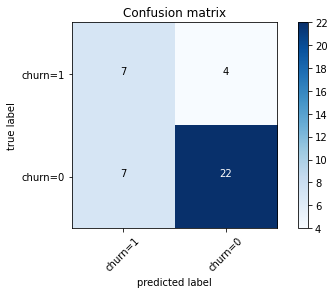

In [18]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test , yhat , labels = [1,0])
np.set_printoptions(precision=2)

# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=['churn=1','churn=0'],normalize = False , title = 'Confusion matrix')


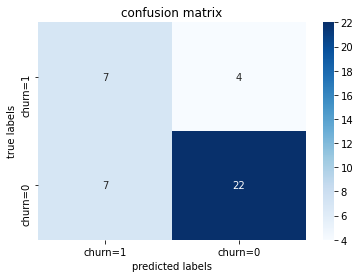

In [39]:
# another way to plot non normalized confusion matrix
import seaborn as sns
sns.heatmap(cnf_matrix ,cmap = "Blues", annot = True , cbar_kws={"orientation":"vertical"},xticklabels = ["churn=1","churn=0"],yticklabels = ["churn=1","churn=0"])
plt.xlabel("predicted labels")
plt.ylabel("true labels")
plt.title("non normalized confusion matrix")
plt.show()

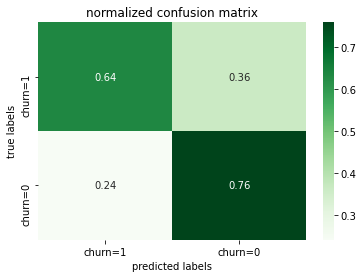

In [40]:
cm_normalized= cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)[:,np.newaxis]
sns.heatmap(cm_normalized ,cmap = "Greens", annot = True , cbar_kws={"orientation":"vertical"},xticklabels = ["churn=1","churn=0"],yticklabels = ["churn=1","churn=0"])
plt.xlabel("predicted labels")
plt.ylabel("true labels")
plt.title("normalized confusion matrix")
plt.show()

In [19]:
print(classification_report(y_test , yhat))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.50      0.64      0.56        11

    accuracy                           0.73        40
   macro avg       0.67      0.70      0.68        40
weighted avg       0.75      0.72      0.73        40



In [20]:
# logloss 
from sklearn.metrics import log_loss
log_loss(y_test , yhat_prob)

0.6294161130214888

In [32]:
# build logistic regression model with different solver and regularization values 

LR2 = LogisticRegression(C= 8 , solver = 'sag').fit(x_train , y_train) # C = 8 is used for regularization
yhat_prob2 = LR.predict_proba(x_test)
print("log loss : %.2f"% log_loss(y_test , yhat_prob2))

log loss : 0.63


C:\Users\vedang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
